# Supervised learning - Linear Regression

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Linear regression

We are going to use a linear regression with scikit-learn. For that, we are going to create a dataset with worked hours and produced units.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [3]:
# Create a dataset
hours = [[80], [79], [83], [84], [78], [60], [82], [85], [79], [84], [80], [62]]
production = [[300], [302], [315], [330], [300], [250], [300], [340], [315], [330], [310], [240]]

# Create the model
linear_model = LinearRegression()
linear_model.fit(hours, production)

# We can test the model with any data:
# The [0][0] is for show the data without [[]]
print('With 70 hours, the production would be: ', linear_model.predict(70)[0][0]) 
print('\n')

# Get the model's prediction
pred = linear_model.predict(hours)

# Get the fit params
print('The fit params are:')
print('w0 = ', linear_model.intercept_[0]) # The [0] is for show data without []
print('w1 = ', linear_model.coef_[0][0])   # The same
print('\n')

# Get the model's metrics:
print("The model's metrics are:")
print('R^2 = ', linear_model.score(hours, production))
print('MSE = ', mean_squared_error(pred, production))
print('MAE = ', mean_absolute_error(pred, production))
print('MedianAE = ', median_absolute_error(pred, production))

With 70 hours, the production would be:  274.879432624


The fit params are:
w0 =  31.7411347518
w1 =  3.47340425532


The model's metrics are:
R^2 =  0.910104853363
MSE =  74.6778959811
MAE =  7.51773049645
MedianAE =  6.79255319149


Let's represent the model of the graphic way:

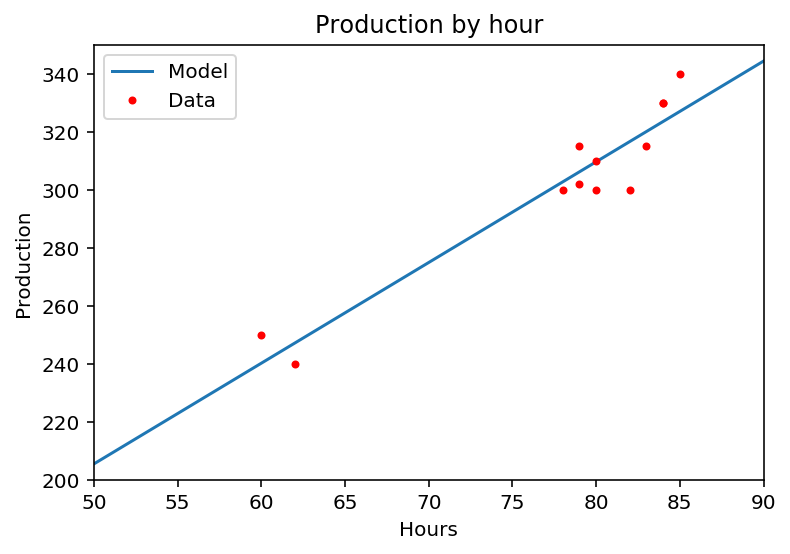

In [4]:
# Let's use a data out of our first data, and use the model for predict them
x_p = [[50], [350]]
y_p = linear_model.predict(x_p)

# Plot the model
plot(x_p, y_p, label = 'Model')
# Plot the beginning points
plot(hours, production, 'r.', label = 'Data')

# Set params of the plot
title('Production by hour')
xlabel('Hours')
ylabel('Production')
axis([50, 90, 200, 350])
legend(loc=2)

If we observe the results, this model indicates that with 0 hours, the production would be 31.74, but this is no real in this problem. For eviting that, we have to indicate in the creation of the model that independent value is 0:

In [5]:
# Create the model without independent term -> fit_intercept = False
linear_model_ni = LinearRegression(fit_intercept = False) 
linear_model_ni.fit(hours, production)

# We can test the model with any data:
# The [0][0] is for show the data without [[]]
print('With 70 hours, the production would be: ', linear_model_ni.predict(70)[0][0]) 
print('\n')

# Get the model's prediction
pred = linear_model_ni.predict(hours)

# Get the fit params
print('The fit params are:')
print('w0 = ', linear_model_ni.intercept_) 
print('w1 = ', linear_model_ni.coef_[0][0])
print('\n')

# Get the model's metrics:
print("The model's metrics are:")
print('R^2 = ', linear_model_ni.score(hours, production))
print('MSE = ', mean_squared_error(pred, production))
print('MAE = ', mean_absolute_error(pred, production))
print('MedianAE = ', median_absolute_error(pred, production))

With 70 hours, the production would be:  271.3335141


The fit params are:
w0 =  0.0
w1 =  3.87619305857


The model's metrics are:
R^2 =  0.897740084514
MSE =  84.9495842372
MAE =  7.2651120752
MedianAE =  5.56190347072


With this model, the $R^2$ is lower, but the model is more real. The way to comparate both models is through a graphic representation:

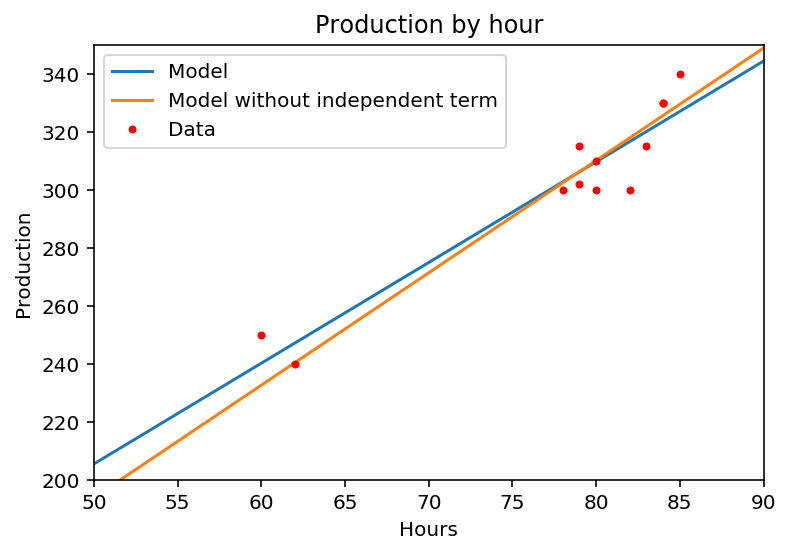

In [6]:
# Let's use a data out of our first data, and use the model for predict them
x_p = [[50], [350]]
y_p = linear_model.predict(x_p)
y_p_ni = linear_model_ni.predict(x_p)

# Plot the models
plot(x_p, y_p, label = 'Model')
plot(x_p, y_p_ni, label = 'Model without independent term')
# Plot the beginning points
plot(hours, production, 'r.', label = 'Data')

# Set params of the plot
title('Production by hour')
xlabel('Hours')
ylabel('Production')
axis([50, 90, 200, 350])
legend(loc=2)

### Multiple linear regression

Now, we are going to use a multiple linear regression with the same data. For that, let's use the `PolynomialFeatures` of scikit-learn

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# include_bias = False, for not use the independent term
poly_2 = PolynomialFeatures(degree = 2, include_bias = False)
# Transform data to 2 degree
hours_2 = poly_2.fit_transform(hours)

# Create and train the model
linear_model_2 = LinearRegression(fit_intercept = False)
linear_model_2.fit(hours_2, production)

# Get the fit params
print('w1 = ', linear_model_2.coef_[0][0])
print('w2 = ', linear_model_2.coef_[0][1])
print('R^2 = ', linear_model_2.score(hours_2, production))

w1 =  4.3166820435
w2 =  -0.00554289145555
R^2 =  0.907592703067


This model obtains higher $R^2$ so, this model is better.

Let's represent the model of the graphic way:

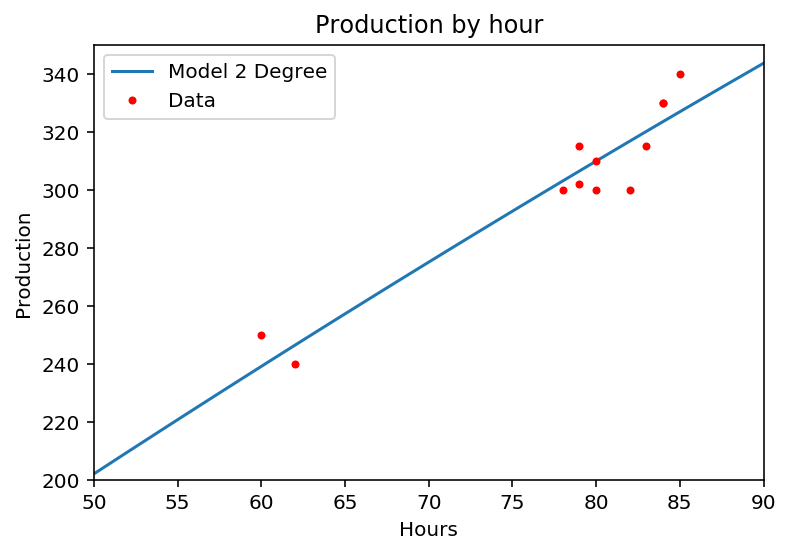

In [9]:
# Create data for prediciting them and plot them
x_p = [[i] for i in range(50, 91)]
y_2 = linear_model_2.predict(poly_2.fit_transform(x_p))


# Plot the model
plot(x_p, y_2, label = 'Model 2 Degree')
# Plot the beginning points
plot(hours, production, 'r.', label = 'Data')

# Set params of the plot
title('Production by hour')
xlabel('Hours')
ylabel('Production')
axis([50, 90, 200, 350])
legend(loc=2)

Let's try what would happen with a polynomial of 5 degree:

In [10]:
# include_bias = False, for not use the independent term
poly_5 = PolynomialFeatures(degree = 5, include_bias = False)
# Transform data to 2 degree
hours_5 = poly_5.fit_transform(hours)

# Create and train the model
linear_model_5 = LinearRegression(fit_intercept = False)
linear_model_5.fit(hours_5, production)

# Compare the R^2 values
print('1 degree R^2 = ', linear_model.score(hours, production))
print('2 degree R^2 = ', linear_model_2.score(hours_2, production))
print('5 degree R^2 = ', linear_model_5.score(hours_5, production))

1 degree R^2 =  0.910104853363
2 degree R^2 =  0.907592703067
5 degree R^2 =  0.969051584371


The $R^2$ of the last model is very high, and for that, we would can think that the model is overfitting. For try that, we are going to represent all models:

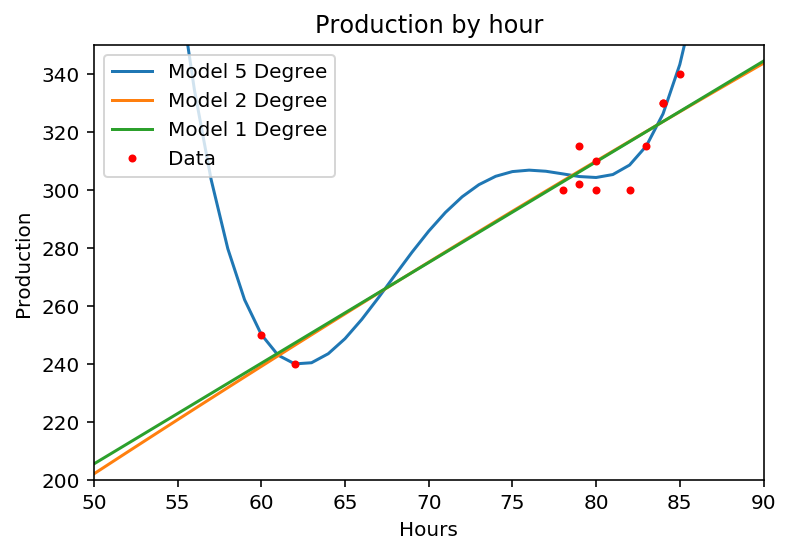

In [11]:
# Create data for prediciting them and plot them
x_p = [[i] for i in range(0, 101)]
y_1 = linear_model.predict(x_p)
y_2 = linear_model_2.predict(poly_2.fit_transform(x_p))
y_5 = linear_model_5.predict(poly_5.fit_transform(x_p))


# Plot the models
plot(x_p, y_5, label = 'Model 5 Degree')
plot(x_p, y_2, label = 'Model 2 Degree')
plot(x_p, y_1, label = 'Model 1 Degree')
# Plot the beginning points
plot(hours, production, 'r.', label = 'Data')

# Set params of the plot
title('Production by hour')
xlabel('Hours')
ylabel('Production')
axis([50, 90, 200, 350])
legend(loc=2)

With this result, we can say that the last model is overfitting, because reproduce almost exactly the data.

### Crossvalidation 

Check that a model is overfitting is simple when the model have less of two independient variables. When it have more, then is is more difficult. If we want to know if a model is overfitting, we should use crossvalidation: take a subset of data like train and another subset like test. With that, if the model is overfitting then with the test dataset its predictions are not correct.

We are going to use crossvalidation with a `Boston` dataset and the `train_test_split` function of scikit-learn

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [13]:
# Import the Boston dataset
boston = load_boston()

# Create a simple model and fit it
boston_model = LinearRegression()
boston_model.fit(boston.data, boston.target)

# Print the R^2 value
print('R^2 = ', boston_model.score(boston.data, boston.target))

R^2 =  0.740607742865


Let's see if the model is overfitting with crossvalidation:

In [14]:
# Default = 75% train, 25% test
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    # train_size, for change default values
                                                    # test_size, for change default values
                                                    random_state = 1) # for the split don't change in each execution

# Create a model and fit it with de train data
cross_model = LinearRegression()
cross_model.fit(x_train, y_train)

# R^2 value
print('Trainning R^2 = ', cross_model.score(x_train, y_train))
print('Testing R^2 = ', cross_model.score(x_test, y_test))

Trainning R^2 =  0.716728680867
Testing R^2 =  0.779025774914


As the $R^2$ value is similar in both cases, we can say that the model is not overfitting.

### Categorical variables

In some dataset, categorical variables can exist and these cannot be used directly for the models. For including the information of a categorical variable in a model, we have to create a dummy variable for each levels of the original variable. It can be done with `pandas` and its `get_dummies()` method.

Let's use this method with the same data but including the categorical variable `Factory`:

In [15]:
import pandas as pd

In [16]:
# Create a dataset
data = [[80, 'Factory 1'], [79, 'Factory 2'], [83, 'Factory 3'], 
        [84, 'Factory 1'], [78, 'Factory 2'], [60, 'Factory 3'], 
        [82, 'Factory 1'], [85, 'Factory 2'], [79, 'Factory 3'],
        [84, 'Factory 1'], [80, 'Factory 2'], [62, 'Factory 3']]
production = [[300], [302], [315], [330], [300], [250], [300], [340], [315], [330], [310], [240]]

# Convert data as dataframe
data = pd.DataFrame(data, columns = ['Hours', 'Factory'])
production = pd.DataFrame(production, columns = ['Production'])

# Print the dataframes together
pd.concat([data, production], axis = 1)

,Hours,Factory,Production
0,80,Factory 1,300
1,79,Factory 2,302
2,83,Factory 3,315
3,84,Factory 1,330
4,78,Factory 2,300
5,60,Factory 3,250
6,82,Factory 1,300
7,85,Factory 2,340
8,79,Factory 3,315
9,84,Factory 1,330


In [17]:
# Create a dummies variables
dummy_data = pd.concat([data['Hours'], pd.get_dummies(data['Factory'])], axis = 1)
# Print it
dummy_data

,Hours,Factory 1,Factory 2,Factory 3
0,80,1,0,0
1,79,0,1,0
2,83,0,0,1
3,84,1,0,0
4,78,0,1,0
5,60,0,0,1
6,82,1,0,0
7,85,0,1,0
8,79,0,0,1
9,84,1,0,0


Now, let's use this data with a linear regression:

In [18]:
# Create and fit the model
dummy_model = LinearRegression(fit_intercept = False)
dummy_model.fit(dummy_data, production)
# Print R^2 value
print('R^2 = ', dummy_model.score(dummy_data, production))

R^2 =  0.918411912883
